# 

In [1]:
# imports
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
# import data
data_import = 'clean_shelter_data.csv'
shelter_data_df = pd.read_csv(data_import, dtype={'Council District': 'string', 'Intake Total': 'string', 'Outcome Subtype': 'string'}, encoding='utf-8')
shelter_data_df

,Unnamed: 0,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Council District,Intake Type,Intake Subtype,Intake Total,...,Outcome Type,Outcome Date,Impound Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Outcome Subtype
0,1,A0001656,DOG,LABRADOR RETR,LAB 01,LAB,6,OWNER SURRENDER,GENERAL,1,...,EUTHANIZED,7/21/2016,K16-353536,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,<NA>
1,2,A0014681,DOG,PIT BULL,PAWS 24,UNAVAILABLE,7,OWNER SURRENDER,GENERAL,1,...,TRANSFER,3/31/2016,K16-338470,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,TAGGHOUSEBROKEN/FREE ADOPT,FEB.2016,FY2016,<NA>
2,3,A0117773,DOG,PIT BULL,LAB 01,LAB,2,OWNER SURRENDER,EUTHANASIA REQUESTED,1,...,EUTHANIZED,7/5/2016,K16-351923,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,<NA>
3,4,A0119934,CAT,RUSSIAN BLUE,LOST,LOST REPORT,14,LOST REPORT,NaN,1,...,LOST REPORT,7/19/2016,K16-345201,HEALTHY,UNABLE TO SCAN,OVER THE COUNTER,NaN,JUL.2016,FY2016,<NA>
4,5,A0132276,CAT,DOMESTIC SH,QC 03,RELEASED FROM QUARANTINE,10,CONFISCATED,QUARANTINE,1,...,RETURNED TO OWNER,9/27/2016,K16-359916,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,UNABLE TO SCAN,FIELD,NaN,SEP.2016,FY2016,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172199,11014,A1100474,DOG,CHIHUAHUA SH,LFSD 18,UNAVAILABLE,1.0,OWNER SURRENDER,FIELD,1,...,RETURNED TO OWNER,4/16/2021,K21-524674,APP WNL,SCAN CHIP,FIELD,AEG,APR.2021,FY2021,WESTMORELD
172200,11017,A0701527,DOG,SCHNAUZER STAND,LFSD 03,IMPOUNDED,7.0,STRAY,CONFINED,1,...,RETURNED TO OWNER,4/16/2021,K21-524654,APP WNL,SCAN CHIP,FIELD,ITR,APR.2021,FY2021,WESTMORELD
172201,11018,A1118116,CAT,DOMESTIC SH,N04,UNAVAILABLE,13.0,STRAY,OTC,1,...,FOSTER,4/16/2021,K21-524648,UNDERAGE,SCAN NO CHIP,OVER THE COUNTER,AEG,APR.2021,FY2021,UNDERAGE
172202,11019,A1116166,DOG,GERM SHEPHERD,LOST,IMPOUNDED,<NA>,STRAY,WEB,1,...,LOST EXP,4/16/2021,K21-522659,NaN,NaN,NaN,NaN,MAR.2021,FY2021,OTHER


# Top 10 animal breeds euthanized
Use dropna to find only animals which contained the outcometype for euthanization and 
also a separate one for only animals which have an outcome subtype for the future.

In [2]:
# find all euth with substype outcomes
euth_df = shelter_data_df.loc[shelter_data_df['Outcome Type']=='EUTHANIZED']
sub_euth = euth_df.dropna(subset = ['Outcome Subtype'])
# find that Dallas only started using subtypes for euthanization in 2018
euth_count = sub_euth['Year'].value_counts()
sub_euth_type = sub_euth.groupby('Outcome Subtype')['Animal Type'].agg(['count'])
sub_euth_breed = sub_euth.groupby('Animal Breed')['Outcome Subtype'].agg(['count'])
sub_euth_breed = sub_euth_breed.sort_values(by = 'count', ascending=False).head(10)
sub_euth_breed


,count
Animal Breed,
PIT BULL,4094
DOMESTIC SH,3615
GERM SHEPHERD,1226
LABRADOR RETR,1098
OPOSSUM,652
RACCOON,645
CHIHUAHUA SH,467
DOMESTIC MH,270
ROTTWEILER,220


# top 5 cat breeds euthanized

Use the imported data to find the top 5 cat breeds which were euthanized the most
by using a value_counts and .head() on only CAT data. Next I found the total number of cats/dogs to 
display in the title. Plot using matplotlib and formatting 

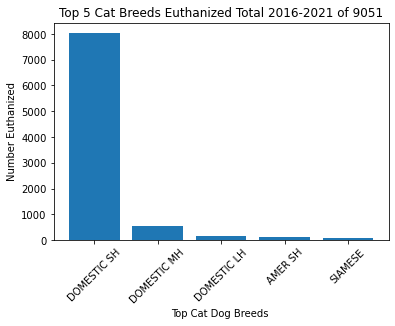

In [3]:
cat_euth = euth_df.loc[euth_df['Animal Type'] == 'CAT']
cat_count = cat_euth['Animal Breed'].value_counts().head()
total_cats = len(cat_euth)
plt.bar(cat_count.index,cat_count)
plt.xticks(rotation=45)
plt.title(f'Top 5 Cat Breeds Euthanized Total 2016-2021 of {total_cats}')
plt.xlabel('Top Cat Dog Breeds ')
plt.ylabel('Number Euthanized')
plt.savefig('../Output/Euth_Top5_Cat',bbox_inches='tight') 
plt.show() 

Use for loop to find the index of the top 5 dogs/cats and find the total number of each top 5 breed. Put the 
number euthanized into a dataframe and merge the total number of top 5 breeds with it and then create a column
to find the percentage of number euthanized and total animals for each breed. Format. 

In [4]:
total_top5_cats = []
for top5_index in cat_count.index:
    total_top5_cats.append(len(shelter_data_df.loc[shelter_data_df['Animal Breed'] == top5_index])) 
cat_euth_percent = pd.DataFrame(cat_count)
cat_euth_percent['Total Cats'] = total_top5_cats
cat_euth_percent['Percent Euthanized'] = round((cat_euth_percent['Animal Breed'])/(cat_euth_percent['Total Cats'])*100,2)
cat_euth_percent['Percent Euthanized'] = cat_euth_percent['Percent Euthanized'].astype(str) + '%'
cat_euth_percent = cat_euth_percent.rename(columns={'Animal Breed':'Number Euthanized'})
cat_euth_percent

,Number Euthanized,Total Cats,Percent Euthanized
DOMESTIC SH,8037,34109,23.56%
DOMESTIC MH,555,2802,19.81%
DOMESTIC LH,162,794,20.4%
AMER SH,117,500,23.4%
SIAMESE,98,608,16.12%


# top 5 dog breeds euthanized

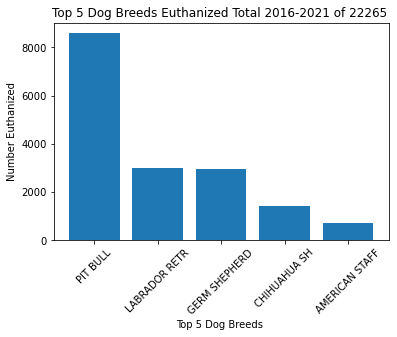

In [5]:
dog_euth = euth_df.loc[euth_df['Animal Type'] == 'DOG']
dog_count = dog_euth['Animal Breed'].value_counts().head()
plt.bar(dog_count.index,dog_count)
plt.xticks(rotation=45)
total_dogs = len(dog_euth)
plt.title(f'Top 5 Dog Breeds Euthanized Total 2016-2021 of {total_dogs} ')
plt.xlabel('Top 5 Dog Breeds ')
plt.ylabel('Number Euthanized')
plt.savefig('../Output/Euth_Top5_Dog',bbox_inches='tight') 
plt.show()


In [6]:
total_top5_dogs = []
for top5_index in dog_count.index:
    total_top5_dogs.append(len(shelter_data_df.loc[shelter_data_df['Animal Breed'] == top5_index])) 
dog_euth_percent = pd.DataFrame(dog_count)
dog_euth_percent['Total Dogs'] = total_top5_dogs
dog_euth_percent['Percent Euthanized'] = round((dog_euth_percent['Animal Breed'])/(dog_euth_percent['Total Dogs'])*100,2)
dog_euth_percent['Percent Euthanized'] = dog_euth_percent['Percent Euthanized'].astype(str) + '%'
dog_euth_percent = dog_euth_percent.rename(columns={'Animal Breed':'Number Euthanized'})
dog_euth_percent

,Number Euthanized,Total Dogs,Percent Euthanized
PIT BULL,8589,27623,31.09%
LABRADOR RETR,2983,15210,19.61%
GERM SHEPHERD,2946,15789,18.66%
CHIHUAHUA SH,1420,16664,8.52%
AMERICAN STAFF,719,1824,39.42%


Use prior dataframes and loc to find only animals with outcome 
type = EUTHANIZATION and equal to DOG. Use value counts to find
the different types of euthanization subtypes and drop the ones
I don't fully understand. Use matplotlib to make a bar chart for 
this and use index to find the names of each subtype. Format. 

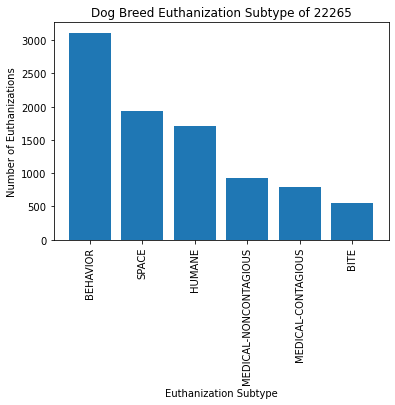

In [7]:
# dog by euthanization subtype
sub_dog = sub_euth.loc[sub_euth['Animal Type'] == 'DOG'] 
sub_dog_count = sub_dog['Outcome Subtype'].value_counts().head(6)
plt.bar(sub_dog_count.index,sub_dog_count)
plt.xticks(rotation=90)
plt.title(f'Dog Breed Euthanization Subtype of {total_dogs}')
plt.xlabel('Euthanization Subtype')
plt.ylabel('Number of Euthanizations')
plt.savefig('../Output/Euth_subtype_dog',bbox_inches='tight') 
plt.show()

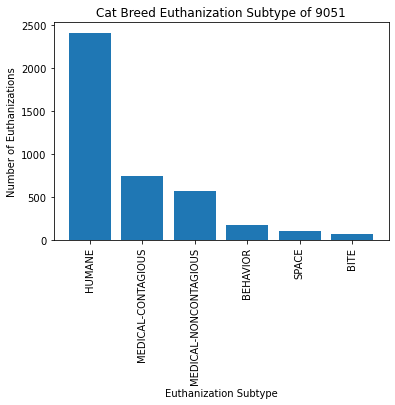

In [8]:
# cat by euthanization subtype
sub_cat = sub_euth.loc[sub_euth['Animal Type'] == 'CAT']
sub_cat_count = sub_cat['Outcome Subtype'].value_counts().head(6)
plt.bar(sub_cat_count.index, sub_cat_count)
plt.xticks(rotation=90)
plt.title(f'Cat Breed Euthanization Subtype of {total_cats}')
plt.xlabel('Euthanization Subtype')
plt.ylabel('Number of Euthanizations')
# cat and dog by euthanization subtype and percentage 
cat_percent = pd.DataFrame(round((sub_cat_count)/(sub_cat_count.sum())*100,2))
cat_percent['Outcome Subtype'] = cat_percent['Outcome Subtype'].astype(str) + '%'
dog_percent = pd.DataFrame(round((sub_dog_count)/(sub_dog_count.sum())*100,2))
dog_percent['Outcome Subtype'] = dog_percent['Outcome Subtype'].astype(str) + '%'
cat_breed_outcomes = pd.merge(sub_cat_count,cat_percent,left_index= True,right_index= True)
sub_dog_count=pd.DataFrame(sub_dog_count)
dog_breed_outcomes = pd.merge(sub_dog_count,dog_percent,left_index=True,right_index=True)
outcomes_combined = pd.merge(dog_breed_outcomes,cat_breed_outcomes,left_index=True,right_index=True)
outcomes_combined.rename(columns={'Outcome Subtype_x_x':'Dog Euthanization Outcomes','Outcome Subtype_y_x':'Dog Euthanization Percents',
                                 'Outcome Subtype_x_y':'Cat Euthanization Outcomes','Outcome Subtype_y_y':'Cat euthanization Percents'},inplace=True)
outcomes_combined
plt.savefig('../Output/Euth_subtype_cat',bbox_inches='tight') 
plt.show()

# Euthanizations per year 

In [9]:
data_2016 = shelter_data_df.loc[shelter_data_df['Year']=='FY2016']
data_2017 = shelter_data_df.loc[shelter_data_df['Year']=='FY2017']
data_2018 = shelter_data_df.loc[shelter_data_df['Year']=='FY2018']
data_2019 = shelter_data_df.loc[shelter_data_df['Year']=='FY2019']
data_2020 = shelter_data_df.loc[shelter_data_df['Year']=='FY2020']
data_2021 = shelter_data_df.loc[shelter_data_df['Year']=='FY2021']

# Percent euthanized vs. adopted

Create a function to find the percentage of each outcome categorized into into four main categories 
for each year by first finding the total number of animals. Next I used len and loc to add each of 
the different categories together as I saw they were related. Create labels and pie values for pie chart
create a literal for whatever year it is and also annotate for the total number of animals in each year. 
Format. 

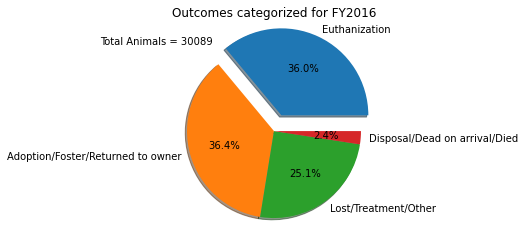

In [10]:
def outcometype(year):
    total_animals = len(year)
    outcome_euth = len(year.loc[year['Outcome Type']== 'EUTHANIZED'])
    outcome_adopt = len(year.loc[year['Outcome Type']== 'ADOPTION']
        ) + len(year.loc[year['Outcome Type']== 'RETURNED TO OWNER']
        ) + len(year.loc[year['Outcome Type']== 'FOSTER']
        ) + len(year.loc[year['Outcome Type']== 'FOUND EXP']
        ) + len(year.loc[year['Outcome Type']== 'FOUND REPORT'] 
        )
    outcome_other = len(year.loc[year['Outcome Type']== 'TRANSFER']
        ) + len(year.loc[year['Outcome Type']== 'WILDLIFE']) + len(
        year.loc[year['Outcome Type']== 'MISSING']) + len(year.loc[year['Outcome Type']== 'TREATMENT']
        ) + len(year.loc[year['Outcome Type']== 'LOST EXP']
        ) + len(year.loc[year['Outcome Type']== 'OTHER']) + len(year.loc[year['Outcome Type']== 'LOST REPORT']) 
    outcome_natural = len(year.loc[year['Outcome Type']== 'DIED']) + len(year.loc[year['Outcome Type'
        ]== 'DEAD ON ARRIVAL']) + len(year.loc[year['Outcome Type']== 'DISPOSAL'])
    labels = ['Euthanization','Adoption/Foster/Returned to owner','Lost/Treatment/Other','Disposal/Dead on arrival/Died']
    pie_values = [outcome_euth,outcome_adopt,outcome_other,outcome_natural]
    explode_val = (.2,0,0,0)
    plt.pie(pie_values, labels = labels, autopct='%1.1f%%', explode = explode_val, shadow=True)
    literal_year = year.iloc[1,24]
    plt.title(f'Outcomes categorized for {literal_year}')
    plt.text(-2,1,f'Total Animals = {total_animals}')
    # years = [data_2016,data_2017,data_2018,data_2019,data_2020,data_2021]
outcometype(data_2016)
plt.savefig('../Output/Percent_Outcomes_2016',bbox_inches='tight') 
plt.show()

# Linear Regression of euthanizations per year 

# If more people adopted in 2020 then the number of euthanizations in a year will be reduced 
# If more people did not adopt in 2020 then the number of euthanzaitions in a year will not be reduced 

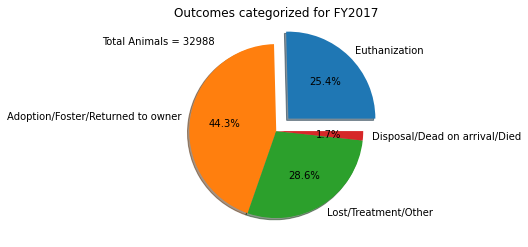

In [11]:
outcometype(data_2017)
plt.savefig('../Output/Percent_Outcomes_2017',bbox_inches='tight') 
plt.show()

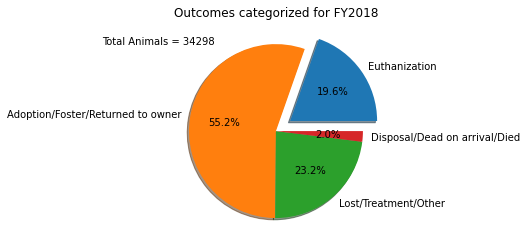

In [12]:
outcometype(data_2018)
plt.savefig('../Output/Percent_Outcomes_2018',bbox_inches='tight') 
plt.show()

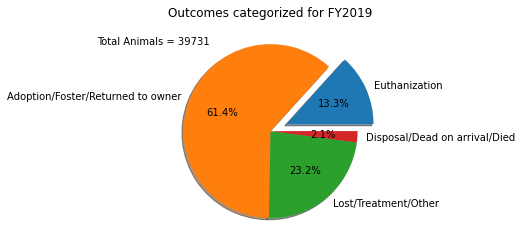

In [13]:
outcometype(data_2019)
plt.savefig('../Output/Percent_Outcomes_2019',bbox_inches='tight') 
plt.show()

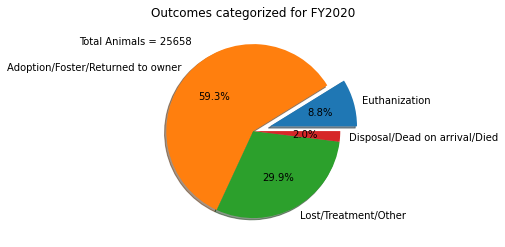

In [14]:
outcometype(data_2020)
plt.savefig('../Output/Percent_Outcomes_2020',bbox_inches='tight') 
plt.show()

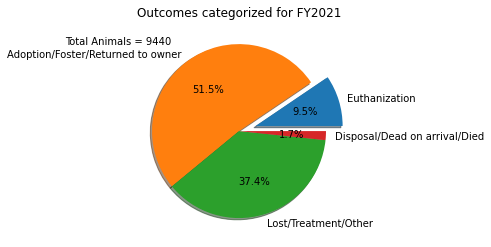

In [15]:
outcometype(data_2021)

# Attempt to Predict Euthanizations for 2021

First I created a list for each of the years so that I could make a 
for loop which would find the number of animals euthanized in a year 
as well as the literal fiscal year. Create a dataframe for the number
of years to put in the graph because I couldn't figure out another way
and its late. Use linear regression formula to plot linear regression
model. Format. 

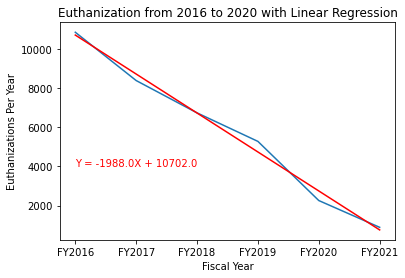

In [16]:
years = [data_2016,data_2017,data_2018,data_2019,data_2020,data_2021]
year_euth_value = []
literal_year = []
x_values = []
for year in years:
    year_euth_value.append(len(year.loc[year['Outcome Type'] == 'EUTHANIZED']))
    literal_year.append(year.iloc[1,24])
x_values = [0,1,2,3,4,5]
onesix = pd.DataFrame()
onesix['index'] = x_values
onesix = onesix.iloc[0:6,0]
plt.plot(literal_year,year_euth_value)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(onesix, year_euth_value)
vc_fit = vc_slope * onesix + vc_int
plt.plot(onesix, vc_fit, color = 'r')
coords = [0,4000]
plt.annotate(f'Y = {round(vc_slope)}X + {round(vc_int)}', coords,color = 'r')
plt.title('Euthanization from 2016 to 2020 with Linear Regression')
plt.xlabel('Fiscal Year')
plt.ylabel('Euthanizations Per Year')
plt.savefig('../Output/Euth_LinearR',bbox_inches='tight') 
plt.show()
